# Statistical *Power*, Effect Size, and Error
![Arnold S. demonstrating power](https://media.giphy.com/media/TIvv7HIMVzbZm/giphy.gif)

## Review: 
    
    1. Null hypothesis: the mean of the sample is not different from the mean of the population.
    
    2. Alternative hypothesis: the mean of the sample is different (two tail), is greater/less than the mean (one-tail). 
    
    3. alpha: the probability of encountering the sample population test statistic when the null hypothesis is assumed to be true. .05 is generally accepted level.
    
    4. Z-test: used when population mean and standard deviation are known, and the sample size is large (>30).
    
    5. T-test: used when the population standard deviation is not known, the sample size is small.

## Part 1. Effect Size
Effect size is used to quantify the size of the difference between two groups under observation. Since during this mod, we primarily compare means of populations, the effect size we will be most interested in is the difference between two means.  We will learn about Cohen's d, a unitless variable which helps generalize effect size across domains.  We will also learn how effect size relates to power, and how we can use it within power calculations.  


### Where does gender have a larger effect?

![effect size demonstrated with sealions and pugs](img/effect_size.png)

### Effect size and perspective 

Calculating effect size on your experiment puts things in perspective for you - in the context of your experiment, you are more likely to learn why and how you achieved significant conclusions as a result of effect size. For example, if you performed an A/B test on examining whether changing the like button on instagram resulted in people liking more post, you want to be cautious on the effect size of the samples you are comparing. 

### Cohen's $d$, standardized metrics for effect size
Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = effect size (difference of means) / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma pooled}$

note: power, which is covered below, is __not__ the same as $d$, but you can use d to look up power on a power table:
http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf

In [4]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/d3/cohend/)

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

### Example
Compare effect size of gender in height

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower

warnings.filterwarnings("ignore")
np.random.seed(10)

In [6]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = stats.norm(female_mean, female_sd)


In [7]:
type(male_height)

scipy.stats._distn_infrastructure.rv_frozen

In [8]:
def evaluate_pdf(rv, x=4):
    '''
    Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''

    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)

    # Calculate the peak of normal distribution i.e. probability density.
    ys = rv.pdf(xs)

    return xs, ys

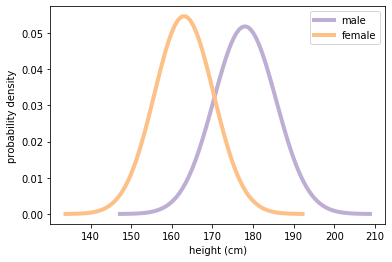

In [9]:
# Male height
xs, ys = evaluate_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.ylabel('probability density')
plt.legend()
plt.show()

In [10]:
np.random.seed(10)

female_sample = female_height.rvs(100)
male_sample = male_height.rvs(100)

effect = cohen_d(male_sample, female_sample)
print(effect)

2.0405441680589274


In [11]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_pdf(group1)
    plt.fill_between(xs, ys, label='Female', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_pdf(group2)
    plt.fill_between(xs, ys, label='Male', color='#376cb0', alpha=0.7)
    plt.legend()

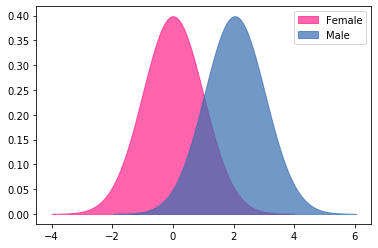

In [12]:
plot_pdfs(effect)

## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

#### Type I error
Type I error is usually represented as $\alpha$, which is the probability of rejecting the null hypothesis when it is in fact true. 

Probability of type I error = $\alpha$ =  P(Rejecting $H_{0}$ | $H_{0}$ is true)

For example, if we compare the height of males and females in a sample, with $\mu$m = 175cm, $\sigma$m = 4cm, and $\mu$f = 170 cm, $\sigma$f = 2.5cm, the __null hypothesis__ would be: there is no difference of heights in two genders. After conducting the appropriate statistical testing and attaining a p-value of .04, we conclude that there is a significant difference in gender. However, the reality is there is no difference. 

#### Type II Error
Type II error is represented as $\beta$. It is the probability of failing to reject the null when it is in fact false. Applying to our case above, we would have said that the two genders do not differ in heights when they in fact do.

Probability of type II error = $\beta$ = P(Accepting $H_{0}$ | $H_{a}$ is true)

Define the null and alternative hypotheses for the scenarios below, along with type I and type II errors:

> - We gathered data about a sample of feral cats and a sample of house cats from Chicago. We want to study whether, based on that sample, feral cats have less teeth than house cats.

> - We gather data about El ridership on rainy days vs sunny days. We want to study whether ridership differs between sunny and rainy days.



## Part 3. Power
How does statistical power relate to two types of error? Power is defined as the __probability of not making a Type
II error__ (i.e., probability of correctly rejecting H0 when it is in fact false).

![errors](img/error_chart.png)

__<center>Power visualized </center>__

![](img/beta_1.png)

![beta_2](img/beta_2.png)

Relevance of Power?
- Low Statistical Power: Large risk of committing Type II errors, e.g. a false negative.
- High Statistical Power: Small risk of committing Type II errors.

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

One doesn't really have control over effect size, but sample size and alpha can possibly be adjusted.

how does sample size affect power?

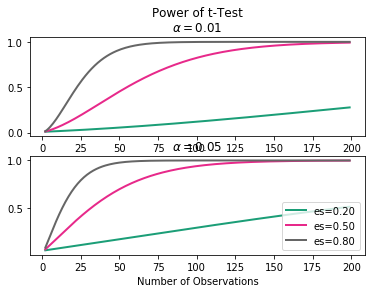

In [13]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 


### Very good visualization showing how effect size, nobs, alpha, and power relate to one-another.
https://rpsychologist.com/d3/NHST/

## Part 4. Case Study 
Suppose you are launching a pilot study with Instagram and you want to examine if the new feature (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer attracted more likes __given__ other variables being held constant. You have collected two datasets. 

In [14]:
experiment = pd.read_csv('ig_experiment.csv')
control = pd.read_csv('ig_control.csv')
experiment.head()

,Unnamed: 0,ID_Exp,Likes_Given_Exp,Avg_Likes_Given_Exp
0,0,1,47,50
1,1,2,54,54
2,2,3,52,59
3,3,4,54,45
4,4,5,45,55


In [15]:
experiment.shape

(35, 4)

### Look at the data

In [16]:
experiment['Likes_Given_Exp'].mean()

50.97142857142857

In [17]:
control['Likes_Given_Con'].mean()

56.08571428571429

In [18]:
control.shape

(35, 4)

In [19]:
experiment.shape

(35, 4)

In [20]:
cohens_d = cohen_d(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])
cohens_d

-0.9924643738965597

In [21]:
# before we even start the experiment, we want to know in order to attain a power of .8 given an alpha of .05,
# how many observations we need 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

25.52457250047935

Luckily, we do have enough observations to conduct this experiment!

In [22]:
# conducting a T Test
stats.ttest_ind(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])

Ttest_indResult(statistic=-4.151776346992102, pvalue=9.403361597139248e-05)

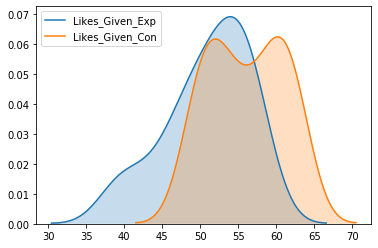

In [23]:
sns.kdeplot(experiment['Likes_Given_Exp'], shade = True)
sns.kdeplot(control['Likes_Given_Con'], shade = True)

In [24]:
d = cohen_d(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])
d

-0.9924643738965597

In [25]:
# now, use d to solve for power.

In [26]:
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = d, 
                                         nobs1 = 25, 
                                         alpha = .05)
power

0.9302822550652173

In [31]:
power_analysis.solve_power(power = .8, 
                                         nobs1 = 35, 
                                         effect_size = .8, alternative='two-sided')

0.015019655775779748

In [52]:
# that is a very high power, almost 1, meaning no type II errors.  
# However, the negative cohen's d suggests there is a negative effect on likes.